In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing # Import Label Encoder

In [2]:
# Read csv
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

print(train_df.shape) # Find Number of rows and columns
print(train_df.columns)

print(test_df.shape) # Find Number of rows and columns
print(test_df.columns)

train_df.head() # Show first 5 records

(4209, 378)
Index(['ID', 'y', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=378)
(4209, 377)
Index(['ID', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8', 'X10',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=377)


,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [3]:
train_df.describe()

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4205.960798,100.669318,0.013305,0.0,0.075077,0.057971,0.428130,0.000475,0.002613,0.007603,...,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,2437.608688,12.679381,0.114590,0.0,0.263547,0.233716,0.494867,0.021796,0.051061,0.086872,...,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,0.000000,72.110000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2095.000000,90.820000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4220.000000,99.150000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6314.000000,109.010000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8417.000000,265.320000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
# If for any column(s), the variance is equal to zero, then you need to remove those variable(s).
# Check the variance

train_df.var()

C:\Users\Maa\AppData\Local\Temp\ipykernel_9584\863617283.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train_df.var()


ID      5.941936e+06
y       1.607667e+02
X10     1.313092e-02
X11     0.000000e+00
X12     6.945713e-02
            ...     
X380    8.014579e-03
X382    7.546747e-03
X383    1.660732e-03
X384    4.750593e-04
X385    1.423823e-03
Length: 370, dtype: float64

In [5]:
# Find out the variance is equal to zero for any columns

(train_df.var() == 0)

C:\Users\Maa\AppData\Local\Temp\ipykernel_9584\2664506896.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  (train_df.var() == 0)


ID      False
y       False
X10     False
X11      True
X12     False
        ...  
X380    False
X382    False
X383    False
X384    False
X385    False
Length: 370, dtype: bool

In [6]:
(train_df.var() == 0).values

C:\Users\Maa\AppData\Local\Temp\ipykernel_9584\2190880080.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  (train_df.var() == 0).values


array([False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [7]:
variance_with_zero = train_df.var()[train_df.var()==0].index.values
variance_with_zero

C:\Users\Maa\AppData\Local\Temp\ipykernel_9584\974452901.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  variance_with_zero = train_df.var()[train_df.var()==0].index.values


array(['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290',
       'X293', 'X297', 'X330', 'X347'], dtype=object)

In [8]:
# Drop zero variance variables

train_df = train_df.drop(variance_with_zero, axis=1)

In [9]:
print(train_df.shape)

(4209, 366)


In [10]:
# As ID column is irrelevant for our prediction hence we drop this column

train_df = train_df.drop(['ID'], axis=1)

In [11]:
train_df.head()

,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,130.81,k,v,at,a,d,u,j,o,0,...,0,0,1,0,0,0,0,0,0,0
1,88.53,k,t,av,e,d,y,l,o,0,...,1,0,0,0,0,0,0,0,0,0
2,76.26,az,w,n,c,d,x,j,x,0,...,0,0,0,0,0,0,1,0,0,0
3,80.62,az,t,n,f,d,x,l,e,0,...,0,0,0,0,0,0,0,0,0,0
4,78.02,az,v,n,f,d,h,d,n,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
#Check for null and unique values for test and train sets.
train_df.isnull().sum().values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [13]:
train_df.isnull().any()

y       False
X0      False
X1      False
X2      False
X3      False
        ...  
X380    False
X382    False
X383    False
X384    False
X385    False
Length: 365, dtype: bool

In [14]:
test_df.isnull().sum().values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [15]:
# Find unique records

train_df.nunique()

y       2545
X0        47
X1        27
X2        44
X3         7
        ... 
X380       2
X382       2
X383       2
X384       2
X385       2
Length: 365, dtype: int64

In [17]:
# Filter out the columns having object datatype
object_datatypes = train_df.select_dtypes(include=[object])
object_datatypes

,X0,X1,X2,X3,X4,X5,X6,X8
0,k,v,at,a,d,u,j,o
1,k,t,av,e,d,y,l,o
2,az,w,n,c,d,x,j,x
3,az,t,n,f,d,x,l,e
4,az,v,n,f,d,h,d,n
...,...,...,...,...,...,...,...,...
4204,ak,s,as,c,d,aa,d,q
4205,j,o,t,d,d,aa,h,h
4206,ak,v,r,a,d,aa,g,e
4207,al,r,e,f,d,aa,l,u


In [18]:
# Apply label encoder.
# Initialize Label Encoder object

label_encoder = preprocessing.LabelEncoder()
train_df['X0'].unique()

array(['k', 'az', 't', 'al', 'o', 'w', 'j', 'h', 's', 'n', 'ay', 'f', 'x',
       'y', 'aj', 'ak', 'am', 'z', 'q', 'at', 'ap', 'v', 'af', 'a', 'e',
       'ai', 'd', 'aq', 'c', 'aa', 'ba', 'as', 'i', 'r', 'b', 'ax', 'bc',
       'u', 'ad', 'au', 'm', 'l', 'aw', 'ao', 'ac', 'g', 'ab'],
      dtype=object)

In [19]:
# Encode and transform object data to interger 

train_df['X0'] = label_encoder.fit_transform(train_df['X0'])

In [20]:
train_df['X0'].unique()

array([32, 20, 40,  9, 36, 43, 31, 29, 39, 35, 19, 27, 44, 45,  7,  8, 10,
       46, 37, 15, 12, 42,  5,  0, 26,  6, 25, 13, 24,  1, 22, 14, 30, 38,
       21, 18, 23, 41,  4, 16, 34, 33, 17, 11,  3, 28,  2])

In [21]:
# Apply same for all columns having object type data

train_df['X1'] = label_encoder.fit_transform(train_df['X1'])
train_df['X2'] = label_encoder.fit_transform(train_df['X2'])
train_df['X3'] = label_encoder.fit_transform(train_df['X3'])
train_df['X4'] = label_encoder.fit_transform(train_df['X4'])
train_df['X5'] = label_encoder.fit_transform(train_df['X5'])
train_df['X6'] = label_encoder.fit_transform(train_df['X6'])
train_df['X8'] = label_encoder.fit_transform(train_df['X8'])

In [72]:
train_df.head()

,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,130.81,32,23,17,0,3,24,9,14,0,...,0,0,1,0,0,0,0,0,0,0
1,88.53,32,21,19,4,3,28,11,14,0,...,1,0,0,0,0,0,0,0,0,0
2,76.26,20,24,34,2,3,27,9,23,0,...,0,0,0,0,0,0,1,0,0,0
3,80.62,20,21,34,5,3,27,11,4,0,...,0,0,0,0,0,0,0,0,0,0
4,78.02,20,23,34,5,3,12,3,13,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
# Perform dimensionality reduction (PCA)
from sklearn.decomposition import PCA

In [94]:
# PCA with 95% 

sklearn_pca = PCA(n_components=0.95)

In [95]:
sklearn_pca.fit(train_df)

PCA(n_components=0.95)

In [96]:
x_train_transformed = sklearn_pca.transform(train_df)

In [97]:
print(x_train_transformed.shape)

(4209, 6)


In [98]:
x_train_transformed

array([[ 14.64981315,  24.16061024,  -1.59174221,  18.05176343,
          6.51301182,   0.46526772],
       [ -5.81324995, -12.39023806,   2.41550102,  16.66162591,
          0.28758716,   1.67225619],
       [  2.08732912, -29.77327191,  14.09851385,  14.92527168,
         -0.35653687,  12.37057663],
       ...,
       [ 29.66515988,  -5.63712965,  14.93827583,  -8.45158121,
         10.71349746,  -5.92545563],
       [ 13.85407413, -21.98582379,   2.8161366 , -11.31273859,
          8.08313713,   9.88600063],
       [-10.42795398,  16.12260911, -10.79396496,  -3.48460531,
         19.02628648,   7.93087431]])

In [66]:
# PCA with 98% 

sklearn_pca_98 = PCA(n_components=0.98)

In [67]:
sklearn_pca_98.fit(train_df)

PCA(n_components=0.98)

In [68]:
x_train_transformed_98 = sklearn_pca_98.transform(train_df)
print(x_train_transformed_98.shape)

(4209, 12)


In [33]:
train_df.y

0       130.81
1        88.53
2        76.26
3        80.62
4        78.02
         ...  
4204    107.39
4205    108.77
4206    109.22
4207     87.48
4208    110.85
Name: y, Length: 4209, dtype: float64

In [77]:
# Train and Test split on Train dataset
X = train_df.iloc[:, 1:365].values
y = train_df.iloc[:, 0].values
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.3,random_state=42)

In [74]:
print(xtrain)
print(xtrain.shape)

[[35 13 16 ...  0  0  0]
 [15 10 16 ...  0  0  0]
 [31  3 16 ...  0  0  0]
 ...
 [45 24  3 ...  0  0  0]
 [45 19  8 ...  0  0  0]
 [22  1  7 ...  0  0  0]]
(2946, 364)


In [76]:
y = train_df.iloc[:, 0].values
y

array([130.81,  88.53,  76.26, ..., 109.22,  87.48, 110.85])

In [99]:
print(ytrain)
print(ytrain.shape)

[ 95.13 117.36 109.01 ...  92.18  91.92  87.71]
(2946,)


In [79]:
print(xtest)
print(xtest.shape)

[[ 9 16  7 ...  0  0  0]
 [27 13  3 ...  0  0  0]
 [31  1 21 ...  0  0  0]
 ...
 [22  3  7 ...  0  0  0]
 [40  1 16 ...  0  0  0]
 [27  4 33 ...  0  0  0]]
(1263, 364)


In [100]:
# PCA with 95% for xtrain

pca_xtrain = PCA(n_components=0.95)
pca_xtrain.fit(xtrain)

PCA(n_components=0.95)

In [101]:
pca_xtrain_transformed = pca_xtrain.transform(xtrain)
print(pca_xtrain_transformed.shape)

(2946, 6)


In [114]:
# PCA with 95% for xtest

pca_xtest = PCA(n_components=0.95)
pca_xtest.fit(xtest)

PCA(n_components=0.95)

In [115]:
pca_xtest_transformed = pca_xtest.transform(xtest)
print(pca_xtest_transformed.shape)

(1263, 6)


In [103]:
print(pca_xtest.explained_variance_)
print(pca_xtest.explained_variance_ratio_)

[206.79524961 120.24273955  67.64680756  61.94375666  48.08214872]
[0.38517942 0.22396563 0.12599979 0.11537722 0.08955841]


In [87]:
# PCA for test_df dataset
test_df

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,21,23,34,5,3,26,0,22,0,0,...,0,0,0,1,0,0,0,0,0,0
1,42,3,8,0,3,9,6,24,0,0,...,0,0,1,0,0,0,0,0,0,0
2,21,23,17,5,3,0,9,9,0,0,...,0,0,0,1,0,0,0,0,0,0
3,21,13,34,5,3,31,11,13,0,0,...,0,0,0,1,0,0,0,0,0,0
4,45,20,17,2,3,30,8,12,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,6,9,17,5,3,1,9,4,0,0,...,0,0,0,0,0,0,0,0,0,0
4205,42,1,8,3,3,1,9,24,0,0,...,0,1,0,0,0,0,0,0,0,0
4206,47,23,17,5,3,1,3,22,0,0,...,0,0,0,0,0,0,0,0,0,0
4207,7,23,17,0,3,1,2,16,0,0,...,0,0,1,0,0,0,0,0,0,0


In [44]:
test_object_datatypes = test_df.select_dtypes(include=[object])
test_object_datatypes

,X0,X1,X2,X3,X4,X5,X6,X8
0,az,v,n,f,d,t,a,w
1,t,b,ai,a,d,b,g,y
2,az,v,as,f,d,a,j,j
3,az,l,n,f,d,z,l,n
4,w,s,as,c,d,y,i,m
...,...,...,...,...,...,...,...,...
4204,aj,h,as,f,d,aa,j,e
4205,t,aa,ai,d,d,aa,j,y
4206,y,v,as,f,d,aa,d,w
4207,ak,v,as,a,d,aa,c,q


In [45]:
test_df['X0'] = label_encoder.fit_transform(test_df['X0'])
test_df['X1'] = label_encoder.fit_transform(test_df['X1'])
test_df['X2'] = label_encoder.fit_transform(test_df['X2'])
test_df['X3'] = label_encoder.fit_transform(test_df['X3'])
test_df['X4'] = label_encoder.fit_transform(test_df['X4'])
test_df['X5'] = label_encoder.fit_transform(test_df['X5'])
test_df['X6'] = label_encoder.fit_transform(test_df['X6'])
test_df['X8'] = label_encoder.fit_transform(test_df['X8'])

In [46]:
print(test_df)
print(test_df.shape)

        ID  X0  X1  X2  X3  X4  X5  X6  X8  X10  ...  X375  X376  X377  X378  \
0        1  21  23  34   5   3  26   0  22    0  ...     0     0     0     1   
1        2  42   3   8   0   3   9   6  24    0  ...     0     0     1     0   
2        3  21  23  17   5   3   0   9   9    0  ...     0     0     0     1   
3        4  21  13  34   5   3  31  11  13    0  ...     0     0     0     1   
4        5  45  20  17   2   3  30   8  12    0  ...     1     0     0     0   
...    ...  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...   ...   ...   ...   ...   
4204  8410   6   9  17   5   3   1   9   4    0  ...     0     0     0     0   
4205  8411  42   1   8   3   3   1   9  24    0  ...     0     1     0     0   
4206  8413  47  23  17   5   3   1   3  22    0  ...     0     0     0     0   
4207  8414   7  23  17   0   3   1   2  16    0  ...     0     0     1     0   
4208  8416  42   1   8   2   3   1   6  17    0  ...     1     0     0     0   

      X379  X380  X382  X383  X384  X38

In [53]:
test_df = test_df.drop('ID',axis=1)

In [104]:
# PCA with 95% for test_df

pca_test_df = PCA(n_components=0.95)
pca_test_df.fit(test_df)

PCA(n_components=0.95)

In [118]:
pca_test_df_transformed = pca_test_df.transform(test_df)
print(pca_test_df_transformed.shape)

(4209, 6)


In [106]:
print(pca_test_df.explained_variance_)
print(pca_test_df.explained_variance_ratio_)

[247.07875325 100.33535335  77.48364816  62.33258307  48.95689653
   8.14203723]
[0.43515102 0.17670897 0.13646292 0.10977912 0.08622208 0.01433962]


In [91]:
from sklearn import svm
from sklearn import model_selection
import xgboost as xgb

In [107]:
model = xgb.XGBRegressor(objective="reg:linear",learning_rate=0.1)

In [110]:
model.fit(pca_xtrain_transformed, ytrain)

[14:49:09] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, objective='reg:linear', predictor='auto',
             random_state=0, reg_alpha=0, ...)

In [120]:
y_pred = model.predict(pca_xtest_transformed)
y_pred

array([ 96.351036,  91.63959 , 106.03736 , ...,  94.573586, 108.25937 ,
       119.60738 ], dtype=float32)

In [126]:
pred=model.predict(pca_test_df_transformed)
pred

array([ 77.15558 ,  95.45458 ,  97.70303 , ..., 106.91319 , 111.43989 ,
        93.508675], dtype=float32)

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Maa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Maa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


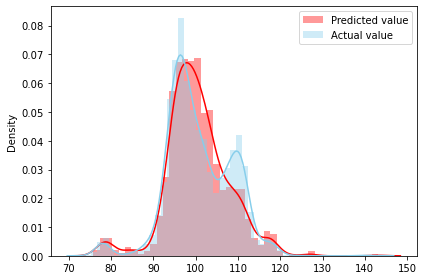

In [127]:
sns.distplot(y_pred[y_pred<160] , color="red", label="Predicted value")
sns.distplot(pred[pred<160], color="skyblue", label="Actual value")
plt.legend()

plt.tight_layout()
